# This file will be script-like, not containing any classes, since it is all in apportionmnet.py


In [27]:
from apportionment import Apportionment
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
total_voters = 100000
num_seats = 150
nit = 100
samples = 100

ap = Apportionment(num_seats, total_voters) # -> TODO higher tresholds for coalitions
#necessary for proper testing of 2020 elections

# nazov_politickeho_subjektu = ["No valid vote", "Pirátska strana - Slovensko", "PRINCÍP", "Progresívne Slovensko", "SPOLOČNE OBČANIA SLOVENSKA", 
#                                 "OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZÁVISLÍ KANDIDÁTI (NEKA), NOVA, SLOBODNÍ A ZODPOVEDNÍ, PAČIVALE ROMA, MAGYAR SZÍVEK a Kresťanská únia a ZA ĽUDÍ", 
#                                 "Komunistická strana Slovenska", "Maďarské fórum, Občianski demokrati Slovenska, Za regióny, Rómska koalícia, Demokratická strana", 
#                                 "Vlastenecký blok", "Modrí, Most - Híd", "SPRAVODLIVOSŤ", "Slovenské Hnutie Obrody", "Sloboda a Solidarita", "SME RODINA", 
#                                 "MySlovensko", "Slovenská národná strana", "SMER - sociálna demokracia", "HLAS - sociálna demokracia", 
#                                 "SZÖVETSÉG - Magyarok. Nemzetiségek. Regiók. | ALIANCIA - Maďari. Národnosti. Regióny", 
#                                 "SRDCE vlastenci a dôchodcovia - SLOVENSKÁ NÁRODNÁ JEDNOTA", "SDKÚ - DS - Slovenská demokratická a kresťanská únia - Demokratická strana", 
#                                 "Kotlebovci - Ľudová strana Naše Slovensko", "Demokrati", "Kresťanskodemokratické hnutie", "KARMA", "REPUBLIKA"]

# pocet_platnych_hlasov = [1420976, 9358, 1817, 533136, 2401, 264137, 9867, 3486, 1262, 7935, 1335, 1332, 187645, 65673, 2786, 166995, 681017, 436415, 130183, 2315, 771, 25003, 87006, 202515, 2407, 141099]

ap.read_votes_from_csv('NRSR2023_demo.csv')

### FROM THERE
result = ap.divide_seats("slovak")
print(sum(result.values()))
print(ap.total_voters)
ll = {ap.subject_names[x]: y  for x, y in result.items()}
for seats, party in ll.items(): print(f'{party} \t {seats}')
### TO THERE 

ap.iterated_simulate('numpy', 'test2demo.csv', num_simulations=nit, samples=samples)

df = pd.read_csv('test2demo.csv')
df

150
100000
32 	 Progresívne Slovensko
16 	 OĽANO A PRIATELIA: OBYČAJNÍ ĽUDIA (OĽANO), NEZÁVISLÍ KANDIDÁTI (NEKA), NOVA, SLOBODNÍ A ZODPOVEDNÍ, PAČIVALE ROMA, MAGYAR SZÍVEK a Kresťanská únia a ZA ĽUDÍ
11 	 Sloboda a Solidarita
10 	 Slovenská národná strana
42 	 SMER - sociálna demokracia
27 	 HLAS - sociálna demokracia
12 	 Kresťanskodemokratické hnutie
Initializing simulation...
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 1

,interation_number,party_number,samples,diff
0,1,1,1,0
1,1,1,2,0
2,1,1,3,0
3,1,1,4,0
4,1,1,5,0
...,...,...,...,...
249995,100,25,96,16
249996,100,25,97,16
249997,100,25,98,16
249998,100,25,99,16


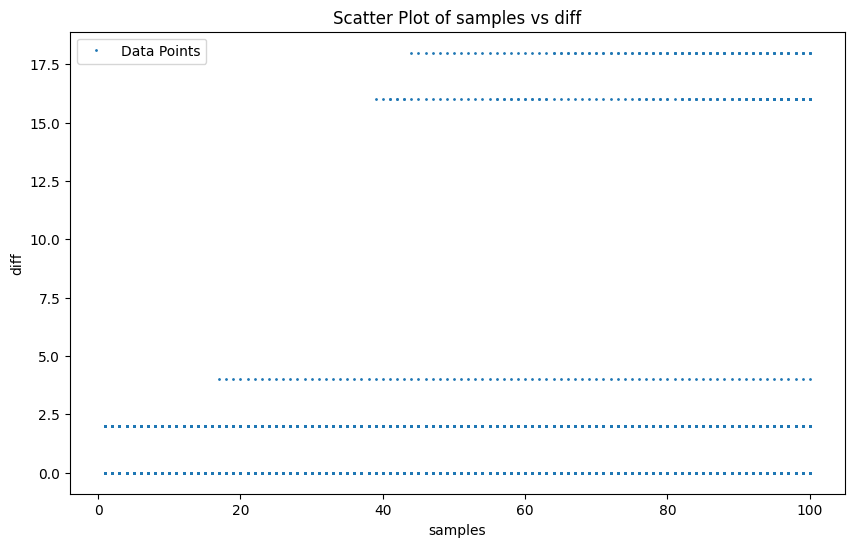

In [29]:
plt.figure(figsize=(10, 6))

x_values = df['samples']
y_values = df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Data Points')

plt.xlabel('samples')
plt.ylabel('diff')
plt.title('Scatter Plot of samples vs diff')

plt.legend()
plt.show()

,interation_number,party_number,diff
samples,,,
1,50.5,13.0,0.0104
2,50.5,13.0,0.0096
3,50.5,13.0,0.0176
4,50.5,13.0,0.0200
5,50.5,13.0,0.0248
...,...,...,...
96,50.5,13.0,0.2832
97,50.5,13.0,0.2896
98,50.5,13.0,0.2912


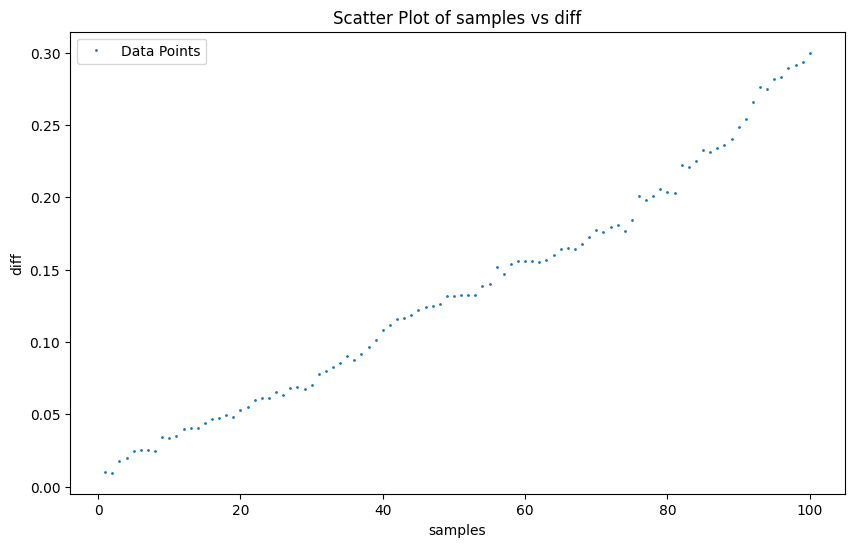

In [30]:
grouped_df = df.groupby('samples').mean()
display(grouped_df)

plt.figure(figsize=(10, 6))

x_values = grouped_df.index
y_values = grouped_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Data Points')

plt.xlabel('samples')
plt.ylabel('diff')
plt.title('Scatter Plot of samples vs diff')

plt.legend()
plt.show()